# Assignment 1
- Use the data from heights_weights_genders.csv to create a simple predictor that takes in a person's height and guesses their weight based on a model using all the data, regardless of gender.
- Find the weights and use those in your function (i.e. don't generate a model each time)

In [185]:
import pandas as pd
import matplotlib.pyplot as plt # package for doing plotting (necessary for adding the line)
import statsmodels.formula.api as smf # package we'll be using for linear regression
%matplotlib inline

In [186]:
# Load the data.
df = pd.read_csv('../data/heights_weights_genders.csv')
df.head(3)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856


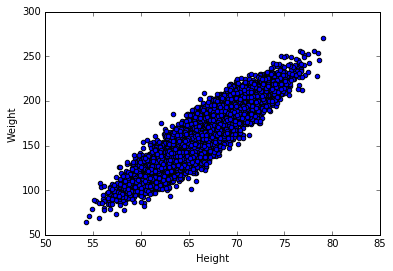

In [187]:
# Take a look at it. 
df.plot(kind="scatter",x="Height",y="Weight")

In [188]:
lm = smf.ols(formula="Weight~Height",data=df).fit()
lm.params
intercept, height = lm.params

In [189]:
# Function using the built math. 
def simplest_predictor(user_height, height, intercept):
    height = float(height)
    intercept = float(intercept)
    user_height = float(user_height)
    return height*user_height+intercept

In [190]:
# Input the data
user_height = input("Please enter your height in inches: ")
print("Your weight will probably be around", simplest_predictor(user_height,height,intercept), "pounds.")

Please enter your height in inches: 70
Your weight will probably be around 189.47294304284964 pounds.


In [191]:
# But how could I do that without using the built in formulas?
# Let's generate some simplified reference data.
ref_dict = {}
inches = range(54,79)
for inch in inches:
    ref_dict[inch] = df.loc[(df["Height"] > inch) & (df["Height"] < inch + 1), "Weight"].median()

In [192]:
# Function to print out the corresponding weight value
def simple_predictor(height):
    height = float(height)
    try:
        if height > 78 or height < 54:
            print("Sorry, we don't have enough data to compute your weight.")
        else:
            print("Your weight is probably around", round(ref_dict[height]), "pounds.") 
    except:
        print("Sorry, we don't understand your input.")  

In [193]:
# Input the data
height = input("Please enter your Height in Inches: ")
simple_predictor(height)

Please enter your Height in Inches: 70
Your weight is probably around 195 pounds.


In [210]:
# Unfortunately, the first predictor is not really a predictor. It just compares with others. 
# It is useless if there is no data. Let's try to find another way. 
df_ref = pd.DataFrame(ref_dict, index=['Weight'])
df_ref = df_ref.transpose()
df_ref['divided'] = df_ref.index / df_ref['Weight']
df_ref['intercept'] = df_ref['divided'].shift(1) - df_ref['divided']
df_ref

,Weight,divided,intercept
54,71.393749,0.756369,NaN
55,88.366583,0.622407,0.133962
56,90.815256,0.616636,0.005771
57,98.719001,0.577396,0.039240
58,103.651090,0.559570,0.017827
59,111.033241,0.531372,0.028197
60,117.069213,0.512517,0.018855
61,123.027361,0.495825,0.016693
62,129.933112,0.477169,0.018656
63,136.373330,0.461967,0.015201


In [211]:
# Let's create a 'magic number' out of the 'divided' column. 
# We are using this number to calculate unknown inputs. The formula: Weight = Height * divided
magicnumber = float(df_ref['divided'].median())
magicintercept = float(df_ref['intercept'].median())

0.014103974532151037

In [212]:
def simple_predictor_2(height2, magicnumber):
    height2 = float(height2)
    return height2 / magicnumber + magicintercept

In [213]:
# Get the user data. 
height2 = input("Please enter your height in inches: ")
print("Your weight is probably around", simple_predictor_2(height2,magicnumber), "pounds.")

Please enter your height in inches: 70
Your weight is probably around 171.85614620312975 pounds.
